In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Exploratory data analysis

### merge datasets

In [6]:
cust=pd.read_csv("C:/Users/91954/PY/py1/assignments/3. Pandas Case Study 1 - Retail Case Study/customer.csv")

In [9]:
cust.head()

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [10]:
prod=pd.read_csv("C:/Users/91954/PY/py1/assignments/3. Pandas Case Study 1 - Retail Case Study/prod_cat_info.csv")

In [12]:
prod.head()

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [13]:
trans=pd.read_csv("C:/Users/91954/PY/py1/assignments/3. Pandas Case Study 1 - Retail Case Study/Transactions.csv")

In [14]:
trans.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


In [25]:
df1=pd.merge(cust,trans,left_on="customer_Id",right_on="cust_id").drop("cust_id",axis=1)


In [21]:
df1.head()

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,268408,02-01-1970,M,4.0,87243835584,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop
1,268408,02-01-1970,M,4.0,16197868036,16-12-2013,1,4,-5,-210,110.250,-1160.250,Flagship store
2,268408,02-01-1970,M,4.0,16197868036,12/12/2013,1,4,5,210,110.250,1160.250,Flagship store
3,268408,02-01-1970,M,4.0,28810141075,2/9/2013,10,6,2,813,170.730,1796.730,TeleShop
4,268408,02-01-1970,M,4.0,64633435931,6/5/2013,4,2,3,312,98.280,1034.280,Flagship store


In [28]:
df=pd.merge(df1,prod,left_on=["prod_cat_code","prod_subcat_code"],right_on=["prod_cat_code","prod_sub_cat_code"]).drop("prod_sub_cat_code",axis=1)

In [29]:
df.head()

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction
1,275152,16-01-1970,M,4.0,73109425404,25-03-2011,7,5,2,464,97.440,1025.440,e-Shop,Books,Fiction
2,275034,18-01-1970,F,4.0,64777271023,23-05-2011,7,5,2,197,41.370,435.370,Flagship store,Books,Fiction
3,270829,22-01-1970,F,8.0,87174343938,9/12/2013,7,5,4,1141,479.220,5043.220,e-Shop,Books,Fiction
4,267657,29-01-1970,F,7.0,76242744953,23-05-2013,7,5,4,1020,428.400,4508.400,e-Shop,Books,Fiction


In [33]:
df.shape

(23053, 15)

In [35]:
display(df.head(10),df.tail(10))

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction
1,275152,16-01-1970,M,4.0,73109425404,25-03-2011,7,5,2,464,97.440,1025.440,e-Shop,Books,Fiction
2,275034,18-01-1970,F,4.0,64777271023,23-05-2011,7,5,2,197,41.370,435.370,Flagship store,Books,Fiction
3,270829,22-01-1970,F,8.0,87174343938,9/12/2013,7,5,4,1141,479.220,5043.220,e-Shop,Books,Fiction
4,267657,29-01-1970,F,7.0,76242744953,23-05-2013,7,5,4,1020,428.400,4508.400,e-Shop,Books,Fiction
5,274630,01-02-1970,M,4.0,78357345891,11/4/2012,7,5,1,646,67.830,713.830,TeleShop,Books,Fiction
6,273541,01-02-1970,M,4.0,23916816961,9/2/2013,7,5,4,410,172.200,1812.200,e-Shop,Books,Fiction
7,269008,13-02-1970,F,6.0,35560569829,9/3/2013,7,5,1,1441,151.305,1592.305,e-Shop,Books,Fiction
8,269008,13-02-1970,F,6.0,94033312891,26-04-2012,7,5,5,746,391.650,4121.650,MBR,Books,Fiction
9,267199,14-02-1970,NaN,2.0,56749259881,11/1/2012,7,5,4,1049,440.580,4636.580,MBR,Books,Fiction


,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
23043,268914,15-11-1992,F,3.0,1407823655,10/6/2011,10,5,1,1252,131.460,1383.460,MBR,Books,Non-Fiction
23044,269519,17-11-1992,M,9.0,29719500605,24-12-2013,10,5,4,1036,435.120,4579.120,TeleShop,Books,Non-Fiction
23045,273524,25-11-1992,F,1.0,25762805863,19-11-2012,10,5,1,1401,147.105,1548.105,Flagship store,Books,Non-Fiction
23046,272141,02-12-1992,F,10.0,71337087467,22-07-2012,10,5,-3,-1422,447.930,-4713.930,e-Shop,Books,Non-Fiction
23047,272141,02-12-1992,F,10.0,71337087467,16-07-2012,10,5,3,1422,447.930,4713.930,e-Shop,Books,Non-Fiction
23048,267812,04-12-1992,F,1.0,63540378797,10/10/2012,10,5,3,224,70.560,742.560,TeleShop,Books,Non-Fiction
23049,274618,09-12-1992,F,7.0,71793203305,17-08-2013,10,5,4,691,290.220,3054.220,Flagship store,Books,Non-Fiction
23050,268097,15-12-1992,F,7.0,91217108818,1/2/2012,10,5,2,411,86.310,908.310,e-Shop,Books,Non-Fiction
23051,268097,15-12-1992,F,7.0,90114483354,31-01-2011,10,5,-4,-1408,591.360,-6223.360,e-Shop,Books,Non-Fiction
23052,268097,15-12-1992,F,7.0,90114483354,26-01-2011,10,5,4,1408,591.360,6223.360,e-Shop,Books,Non-Fiction


In [207]:
df.duplicated().sum()

13

In [208]:
df.drop_duplicates(inplace=True)

In [209]:
df.duplicated().sum()

0

## Prepare a summary report 

In [210]:
df.isnull().sum()

customer_Id         0
DOB                 0
Gender              9
city_code           8
transaction_id      0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
prod_cat            0
prod_subcat         0
dtype: int64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23053 entries, 0 to 23052
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_Id       23053 non-null  int64  
 1   DOB               23053 non-null  object 
 2   Gender            23044 non-null  object 
 3   city_code         23045 non-null  float64
 4   transaction_id    23053 non-null  int64  
 5   tran_date         23053 non-null  object 
 6   prod_subcat_code  23053 non-null  int64  
 7   prod_cat_code     23053 non-null  int64  
 8   Qty               23053 non-null  int64  
 9   Rate              23053 non-null  int64  
 10  Tax               23053 non-null  float64
 11  total_amt         23053 non-null  float64
 12  Store_type        23053 non-null  object 
 13  prod_cat          23053 non-null  object 
 14  prod_subcat       23053 non-null  object 
dtypes: float64(3), int64(6), object(6)
memory usage: 2.8+ MB


In [108]:
df["tran_date"]=df["tran_date"].astype("datetime64")
df["DOB"]=df["DOB"].astype("datetime64")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23053 entries, 0 to 23052
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customer_Id       23053 non-null  int64         
 1   DOB               23053 non-null  datetime64[ns]
 2   Gender            23044 non-null  object        
 3   city_code         23045 non-null  float64       
 4   transaction_id    23053 non-null  int64         
 5   tran_date         23053 non-null  datetime64[ns]
 6   prod_subcat_code  23053 non-null  int64         
 7   prod_cat_code     23053 non-null  int64         
 8   Qty               23053 non-null  int64         
 9   Rate              23053 non-null  int64         
 10  Tax               23053 non-null  float64       
 11  total_amt         23053 non-null  float64       
 12  Store_type        23053 non-null  object        
 13  prod_cat          23053 non-null  object        
 14  prod_subcat       2305

In [36]:
num = df.select_dtypes(include=[np.number])
cat = df.select_dtypes(exclude=[np.number])

In [38]:
cat.head()

,DOB,Gender,tran_date,Store_type,prod_cat,prod_subcat
0,02-01-1970,M,13-01-2014,TeleShop,Books,Fiction
1,16-01-1970,M,25-03-2011,e-Shop,Books,Fiction
2,18-01-1970,F,23-05-2011,Flagship store,Books,Fiction
3,22-01-1970,F,9/12/2013,e-Shop,Books,Fiction
4,29-01-1970,F,23-05-2013,e-Shop,Books,Fiction


In [44]:
num.head()

,customer_Id,city_code,transaction_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt
0,268408,4.0,87243835584,7,5,5,187,98.175,1033.175
1,275152,4.0,73109425404,7,5,2,464,97.440,1025.440
2,275034,4.0,64777271023,7,5,2,197,41.370,435.370
3,270829,8.0,87174343938,7,5,4,1141,479.220,5043.220
4,267657,7.0,76242744953,7,5,4,1020,428.400,4508.400


In [53]:
numc=num[["Qty","Rate","Tax","total_amt"]]

In [56]:
numc.describe()

,Qty,Rate,Tax,total_amt
count,23053.000000,23053.000000,23053.000000,23053.000000
mean,2.432395,636.369713,248.667192,2107.308002
std,2.268406,622.363498,187.177773,2507.561264
min,-5.000000,-1499.000000,7.350000,-8270.925000
25%,1.000000,312.000000,98.280000,762.450000
50%,3.000000,710.000000,199.080000,1754.740000
75%,4.000000,1109.000000,365.715000,3569.150000
max,5.000000,1500.000000,787.500000,8287.500000


In [65]:
for i in cat.columns:
    if cat[i].dtype=='object':
        print(cat[i].value_counts())

27-12-1988    32
17-09-1982    32
25-02-1974    27
20-03-1972    25
18-11-1991    24
              ..
18-08-1975     1
23-08-1982     1
07-06-1989     1
01-06-1988     1
06-05-1978     1
Name: DOB, Length: 3987, dtype: int64
M    11811
F    11233
Name: Gender, dtype: int64
13-07-2011    35
25-09-2011    33
22-11-2011    33
21-12-2013    33
23-10-2011    33
              ..
23-02-2014     2
24-02-2014     2
21-02-2014     1
27-02-2014     1
28-02-2014     1
Name: tran_date, Length: 1129, dtype: int64
e-Shop            9311
MBR               4661
Flagship store    4577
TeleShop          4504
Name: Store_type, dtype: int64
Books               6069
Electronics         4898
Home and kitchen    4129
Footwear            2999
Clothing            2960
Bags                1998
Name: prod_cat, dtype: int64
Women                  3048
Mens                   2912
Kids                   1997
Tools                  1062
Fiction                1043
Kitchen                1037
Children               10

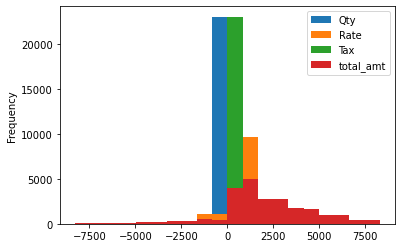

In [88]:
numc.plot(kind="hist",bins=20)

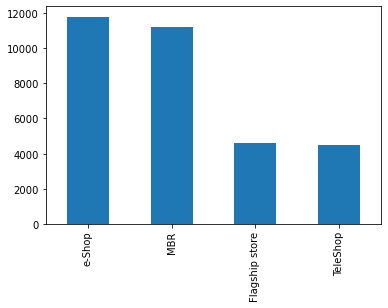

In [98]:
cat["Gender"].value_counts().plot(kind="bar")
cat["Store_type"].value_counts().plot(kind="bar")

### 4. Available time period of dataset

In [100]:
df.head()

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction
1,275152,16-01-1970,M,4.0,73109425404,25-03-2011,7,5,2,464,97.440,1025.440,e-Shop,Books,Fiction
2,275034,18-01-1970,F,4.0,64777271023,23-05-2011,7,5,2,197,41.370,435.370,Flagship store,Books,Fiction
3,270829,22-01-1970,F,8.0,87174343938,9/12/2013,7,5,4,1141,479.220,5043.220,e-Shop,Books,Fiction
4,267657,29-01-1970,F,7.0,76242744953,23-05-2013,7,5,4,1020,428.400,4508.400,e-Shop,Books,Fiction


In [109]:
(df.tran_date.max() - df.tran_date.min()).days

1430

### 4. count of transaction , which are negative 

In [186]:
df.head()

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,1970-02-01,M,4.0,87243835584,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction
1,275152,1970-01-16,M,4.0,73109425404,2011-03-25,7,5,2,464,97.440,1025.440,e-Shop,Books,Fiction
2,275034,1970-01-18,F,4.0,64777271023,2011-05-23,7,5,2,197,41.370,435.370,Flagship store,Books,Fiction
3,270829,1970-01-22,F,8.0,87174343938,2013-09-12,7,5,4,1141,479.220,5043.220,e-Shop,Books,Fiction
4,267657,1970-01-29,F,7.0,76242744953,2013-05-23,7,5,4,1020,428.400,4508.400,e-Shop,Books,Fiction


In [123]:
len(df[df["Qty"]<0])

2177

### 5. Analyze which product categories are more popular among females vs male customers.

In [141]:
c1=pd.crosstab(index=df["Gender"],columns=df["prod_cat"]).T
c1
c1.idxmax()

Gender
F    Books
M    Books
dtype: object

### 6. Which City code has the maximum customers and what was the percentage of customers of that city?

In [168]:
z=df.groupby(["city_code"])["customer_Id"].count()
display(z.idxmax(),round(z.max()*100/z.sum(),1))

4.0

10.5

### 7. Which store type sells the maximum products by value and by quantity?

In [178]:
q=df.groupby(["Store_type"])[["total_amt"]].sum()
q.idxmax()

total_amt    e-Shop
dtype: object

In [179]:
df.groupby(["Store_type"])[["Qty"]].sum().idxmax()

Qty    e-Shop
dtype: object

### 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [193]:
q1=df.pivot_table(index="prod_cat",columns="Store_type",values="total_amt",aggfunc="sum")
q1

Store_type,Flagship store,MBR,TeleShop,e-Shop
prod_cat,,,,
Bags,870548.835,848678.675,789181.055,1616300.075
Books,2488205.850,2496039.195,2545005.060,5293443.935
Clothing,1194423.230,1287686.335,1241834.360,2527193.565
Electronics,2215136.040,2107514.565,1973338.835,4426474.195
Footwear,1234806.560,1112163.715,1235719.290,2637084.710
Home and kitchen,1712567.675,1822403.570,1579702.475,3324319.570


In [195]:
q2=q1.loc[["Electronics","Clothing"],"Flagship store"]
q2

prod_cat
Electronics    2215136.04
Clothing       1194423.23
Name: Flagship store, dtype: float64

In [197]:
round(q2.sum(),2)

3409559.27

### 9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [200]:
df.head()
w1=df.pivot_table(index="prod_cat",columns="Gender",values="total_amt",aggfunc="sum")
w1

Gender,F,M
prod_cat,,
Bags,2077985.650,2046722.990
Books,6164692.235,6645972.775
Clothing,3026750.805,3224079.495
Electronics,5019354.210,5703109.425
Footwear,3202552.990,3014672.050
Home and kitchen,4132177.335,4301075.480


In [202]:
round(w1.loc["Electronics","M"],2)

5703109.43

### 10. How many customers have more than 10 unique transactions, after removing all transactions ,which have any negative amounts?

In [215]:
df.head()
p1=df.loc[df["total_amt"]>0]
p1

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,1970-02-01,M,4.0,87243835584,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction
1,275152,1970-01-16,M,4.0,73109425404,2011-03-25,7,5,2,464,97.440,1025.440,e-Shop,Books,Fiction
2,275034,1970-01-18,F,4.0,64777271023,2011-05-23,7,5,2,197,41.370,435.370,Flagship store,Books,Fiction
3,270829,1970-01-22,F,8.0,87174343938,2013-09-12,7,5,4,1141,479.220,5043.220,e-Shop,Books,Fiction
4,267657,1970-01-29,F,7.0,76242744953,2013-05-23,7,5,4,1020,428.400,4508.400,e-Shop,Books,Fiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23047,272141,1992-02-12,F,10.0,71337087467,2012-07-16,10,5,3,1422,447.930,4713.930,e-Shop,Books,Non-Fiction
23048,267812,1992-04-12,F,1.0,63540378797,2012-10-10,10,5,3,224,70.560,742.560,TeleShop,Books,Non-Fiction
23049,274618,1992-09-12,F,7.0,71793203305,2013-08-17,10,5,4,691,290.220,3054.220,Flagship store,Books,Non-Fiction
23050,268097,1992-12-15,F,7.0,91217108818,2012-01-02,10,5,2,411,86.310,908.310,e-Shop,Books,Non-Fiction


In [236]:
p2=p1.groupby(["customer_Id","prod_cat","prod_subcat"])["transaction_id"].count().reset_index()
p2

,customer_Id,prod_cat,prod_subcat,transaction_id
0,266783,Books,Non-Fiction,1
1,266783,Clothing,Mens,2
2,266783,Footwear,Mens,1
3,266784,Books,Fiction,1
4,266784,Books,Non-Fiction,1
...,...,...,...,...
19273,275264,Books,Non-Fiction,1
19274,275264,Home and kitchen,Tools,1
19275,275265,Bags,Mens,1
19276,275265,Books,Academic,1


In [237]:
p3=p2.groupby(["customer_Id"])["transaction_id"].sum()
p3[p]

customer_Id
266783     4
266784     3
266785     7
266788     4
266794    11
          ..
275257     4
275261     3
275262     2
275264     2
275265     3
Name: transaction_id, Length: 5506, dtype: int64

In [239]:
len(p3[p3>10])

6

### 10.For all customers aged between 25 - 35,

In [250]:
df.head()
n=pd.Timestamp("now")
customer_final=df
customer_final

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,1970-02-01,M,4.0,87243835584,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction
1,275152,1970-01-16,M,4.0,73109425404,2011-03-25,7,5,2,464,97.440,1025.440,e-Shop,Books,Fiction
2,275034,1970-01-18,F,4.0,64777271023,2011-05-23,7,5,2,197,41.370,435.370,Flagship store,Books,Fiction
3,270829,1970-01-22,F,8.0,87174343938,2013-09-12,7,5,4,1141,479.220,5043.220,e-Shop,Books,Fiction
4,267657,1970-01-29,F,7.0,76242744953,2013-05-23,7,5,4,1020,428.400,4508.400,e-Shop,Books,Fiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,267812,1992-04-12,F,1.0,63540378797,2012-10-10,10,5,3,224,70.560,742.560,TeleShop,Books,Non-Fiction
23049,274618,1992-09-12,F,7.0,71793203305,2013-08-17,10,5,4,691,290.220,3054.220,Flagship store,Books,Non-Fiction
23050,268097,1992-12-15,F,7.0,91217108818,2012-01-02,10,5,2,411,86.310,908.310,e-Shop,Books,Non-Fiction
23051,268097,1992-12-15,F,7.0,90114483354,2011-01-31,10,5,-4,-1408,591.360,-6223.360,e-Shop,Books,Non-Fiction


In [256]:
n=pd.Timestamp("now")
n

Timestamp('2020-09-13 22:06:05.054523')

In [252]:
now = pd.Timestamp('now')
customer_final['DOB'] = pd.to_datetime(customer_final['DOB'], format='%m%d%y')    # 1
customer_final['DOB'] = customer_final['DOB'].where(customer_final['DOB'] < now, customer_final['DOB'] -  np.timedelta64(100, 'Y'))   # 2
customer_final['AGE'] = (now - customer_final['DOB']).astype('<m8[Y]')
customer_final

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,AGE
0,268408,1970-02-01,M,4.0,87243835584,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction,50.0
1,275152,1970-01-16,M,4.0,73109425404,2011-03-25,7,5,2,464,97.440,1025.440,e-Shop,Books,Fiction,50.0
2,275034,1970-01-18,F,4.0,64777271023,2011-05-23,7,5,2,197,41.370,435.370,Flagship store,Books,Fiction,50.0
3,270829,1970-01-22,F,8.0,87174343938,2013-09-12,7,5,4,1141,479.220,5043.220,e-Shop,Books,Fiction,50.0
4,267657,1970-01-29,F,7.0,76242744953,2013-05-23,7,5,4,1020,428.400,4508.400,e-Shop,Books,Fiction,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,267812,1992-04-12,F,1.0,63540378797,2012-10-10,10,5,3,224,70.560,742.560,TeleShop,Books,Non-Fiction,28.0
23049,274618,1992-09-12,F,7.0,71793203305,2013-08-17,10,5,4,691,290.220,3054.220,Flagship store,Books,Non-Fiction,28.0
23050,268097,1992-12-15,F,7.0,91217108818,2012-01-02,10,5,2,411,86.310,908.310,e-Shop,Books,Non-Fiction,27.0
23051,268097,1992-12-15,F,7.0,90114483354,2011-01-31,10,5,-4,-1408,591.360,-6223.360,e-Shop,Books,Non-Fiction,27.0


In [257]:
customer_final['Age_cat'] = pd.cut(customer_final['AGE'],bins=[24,35,46,57],labels=['25-35','36-46','47-57'],include_lowest=True)
customer_final

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,AGE,Age_cat
0,268408,1970-02-01,M,4.0,87243835584,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction,50.0,47-57
1,275152,1970-01-16,M,4.0,73109425404,2011-03-25,7,5,2,464,97.440,1025.440,e-Shop,Books,Fiction,50.0,47-57
2,275034,1970-01-18,F,4.0,64777271023,2011-05-23,7,5,2,197,41.370,435.370,Flagship store,Books,Fiction,50.0,47-57
3,270829,1970-01-22,F,8.0,87174343938,2013-09-12,7,5,4,1141,479.220,5043.220,e-Shop,Books,Fiction,50.0,47-57
4,267657,1970-01-29,F,7.0,76242744953,2013-05-23,7,5,4,1020,428.400,4508.400,e-Shop,Books,Fiction,50.0,47-57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,267812,1992-04-12,F,1.0,63540378797,2012-10-10,10,5,3,224,70.560,742.560,TeleShop,Books,Non-Fiction,28.0,25-35
23049,274618,1992-09-12,F,7.0,71793203305,2013-08-17,10,5,4,691,290.220,3054.220,Flagship store,Books,Non-Fiction,28.0,25-35
23050,268097,1992-12-15,F,7.0,91217108818,2012-01-02,10,5,2,411,86.310,908.310,e-Shop,Books,Non-Fiction,27.0,25-35
23051,268097,1992-12-15,F,7.0,90114483354,2011-01-31,10,5,-4,-1408,591.360,-6223.360,e-Shop,Books,Non-Fiction,27.0,25-35


In [261]:
cf=customer_final.loc[customer_final["Age_cat"]=="25-35",:]
cf

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,AGE,Age_cat
666,273017,1984-11-07,M,7.0,58948493591,2012-11-29,7,5,2,486,102.060,1074.060,TeleShop,Books,Fiction,35.0,25-35
670,273417,1984-11-08,M,8.0,58493517259,2013-07-30,7,5,-5,-1463,768.075,-8083.075,e-Shop,Books,Fiction,35.0,25-35
671,273417,1984-11-08,M,8.0,58493517259,2013-07-21,7,5,5,1463,768.075,8083.075,e-Shop,Books,Fiction,35.0,25-35
674,267407,1984-11-09,M,1.0,1215875049,2012-03-10,7,5,1,1217,127.785,1344.785,TeleShop,Books,Fiction,35.0,25-35
675,267825,1984-10-16,F,9.0,18872716621,2012-03-26,7,5,5,503,264.075,2779.075,e-Shop,Books,Fiction,35.0,25-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,267812,1992-04-12,F,1.0,63540378797,2012-10-10,10,5,3,224,70.560,742.560,TeleShop,Books,Non-Fiction,28.0,25-35
23049,274618,1992-09-12,F,7.0,71793203305,2013-08-17,10,5,4,691,290.220,3054.220,Flagship store,Books,Non-Fiction,28.0,25-35
23050,268097,1992-12-15,F,7.0,91217108818,2012-01-02,10,5,2,411,86.310,908.310,e-Shop,Books,Non-Fiction,27.0,25-35
23051,268097,1992-12-15,F,7.0,90114483354,2011-01-31,10,5,-4,-1408,591.360,-6223.360,e-Shop,Books,Non-Fiction,27.0,25-35


###  a. What was the total amount spent for “Electronics” and “Books” product categories? 

In [301]:
cf1=cf.groupby(["prod_cat"])["total_amt"].sum()
cf2=pd.DataFrame(cf1)
cf2

,total_amt
prod_cat,
Bags,1423842.225
Books,4466086.235
Clothing,2440557.145
Electronics,4013031.815
Footwear,2290219.685
Home and kitchen,3102680.880


In [307]:
cf2.loc[["Books","Electronics"],"total_amt"].sum().round(2)

8479118.05

###  b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [281]:
cf.head()

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,AGE,Age_cat
666,273017,1984-11-07,M,7.0,58948493591,2012-11-29,7,5,2,486,102.060,1074.060,TeleShop,Books,Fiction,35.0,25-35
670,273417,1984-11-08,M,8.0,58493517259,2013-07-30,7,5,-5,-1463,768.075,-8083.075,e-Shop,Books,Fiction,35.0,25-35
671,273417,1984-11-08,M,8.0,58493517259,2013-07-21,7,5,5,1463,768.075,8083.075,e-Shop,Books,Fiction,35.0,25-35
674,267407,1984-11-09,M,1.0,1215875049,2012-03-10,7,5,1,1217,127.785,1344.785,TeleShop,Books,Fiction,35.0,25-35
675,267825,1984-10-16,F,9.0,18872716621,2012-03-26,7,5,5,503,264.075,2779.075,e-Shop,Books,Fiction,35.0,25-35


In [291]:
tf=cf[(cf["tran_date"]>="2014-01-01") & (cf["tran_date"]<="2014-03-01")]
tf

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,AGE,Age_cat
686,274991,1985-03-21,M,8.0,49916924033,2014-01-18,7,5,3,527,166.005,1747.005,MBR,Books,Fiction,35.0,25-35
696,273627,1985-06-18,M,8.0,69368153122,2014-01-01,7,5,3,311,97.965,1030.965,TeleShop,Books,Fiction,35.0,25-35
724,270253,1985-12-28,M,5.0,33430226218,2014-01-23,7,5,4,1172,492.240,5180.240,Flagship store,Books,Fiction,34.0,25-35
759,268565,1986-02-07,F,4.0,11698340645,2014-01-22,7,5,4,295,123.900,1303.900,e-Shop,Books,Fiction,34.0,25-35
805,274923,1987-08-09,M,8.0,21647178150,2014-01-29,7,5,5,812,426.300,4486.300,Flagship store,Books,Fiction,33.0,25-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22910,274000,1989-08-22,M,10.0,789912743,2014-01-01,10,5,2,295,61.950,651.950,e-Shop,Books,Non-Fiction,31.0,25-35
22922,269637,1989-10-12,F,1.0,42879420828,2014-01-14,10,5,1,778,81.690,859.690,MBR,Books,Non-Fiction,30.0,25-35
22934,269536,1990-03-21,M,5.0,32889219128,2014-01-01,10,5,5,1423,747.075,7862.075,e-Shop,Books,Non-Fiction,30.0,25-35
22959,272165,1990-01-12,M,4.0,91039584326,2014-02-01,10,5,1,1268,133.140,1401.140,e-Shop,Books,Non-Fiction,30.0,25-35


In [292]:
tf["total_amt"].sum()

572877.305